In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
file = "cdc_dataset.csv"
file_df = pd.read_csv(file)
file_df.head()

,disease,state,epi_week,incidence_per_100000
0,DIPHTHERIA,MA,192152,31.11
1,DIPHTHERIA,MA,192251,39.81
2,DIPHTHERIA,MA,191635,14.98
3,DIPHTHERIA,MA,191713,53.34
4,DIPHTHERIA,MA,192135,35.84


In [18]:
ca_df = file_df.loc[file_df["state"] == "CA", :]
ca_df = ca_df.reset_index()
ca_df = ca_df.drop(columns=["index"])
ca_df.head()

,disease,state,epi_week,incidence_per_100000
0,DIPHTHERIA,CA,192428,18.72
1,DIPHTHERIA,CA,191804,8.98
2,DIPHTHERIA,CA,193509,10.90
3,DIPHTHERIA,CA,192644,8.22
4,DIPHTHERIA,CA,194612,0.11


In [19]:
ca_meas_df = ca_df.loc[ca_df["disease"] == "MEASLES"]
ca_meas_df = ca_meas_df.sort_values("epi_week")
ca_meas_df = ca_meas_df.reset_index()
ca_meas_df.head()

,index,disease,state,epi_week,incidence_per_100000
0,1983,MEASLES,CA,192801,1.38
1,12820,MEASLES,CA,192802,1.80
2,10365,MEASLES,CA,192803,1.31
3,10864,MEASLES,CA,192804,1.87
4,10089,MEASLES,CA,192805,2.38


In [20]:
ca_rounded_df = ca_meas_df
ca_rounded_df["epi_week"] = ca_rounded_df["epi_week"]/100
#ca_rounded_df["epi_week"] = int(ca_rounded_df["epi_week"])
ca_rounded_df.head()

,index,disease,state,epi_week,incidence_per_100000
0,1983,MEASLES,CA,1928.01,1.38
1,12820,MEASLES,CA,1928.02,1.80
2,10365,MEASLES,CA,1928.03,1.31
3,10864,MEASLES,CA,1928.04,1.87
4,10089,MEASLES,CA,1928.05,2.38


In [21]:
ca_rounded_df["epi_week"] = ca_rounded_df["epi_week"].astype(int)
ca_rounded_dropped_df = ca_rounded_df.groupby(["epi_week"]).sum()
ca_rounded_dropped_df = ca_rounded_dropped_df.reset_index()
ca_rounded_dropped_df = ca_rounded_dropped_df.drop(columns="index")
ca_rounded_dropped_df = ca_rounded_dropped_df.rename(columns={"epi_week":"year"})
ca_rounded_dropped_df.head()

,year,incidence_per_100000
0,1928,69.22
1,1929,72.80
2,1930,760.24
3,1931,477.48
4,1932,214.08


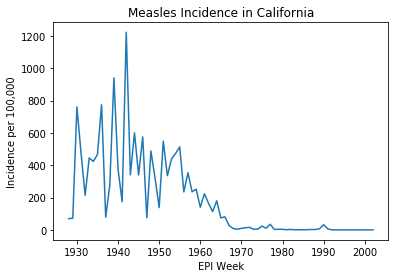

In [28]:

plt.plot(ca_rounded_dropped_df["year"], ca_rounded_dropped_df["incidence_per_100000"])

plt.title("Measles Incidence in California")
plt.xlabel("EPI Week")
plt.ylabel("Incidence per 100,000")
plt.savefig("measles.png", dpi=200)
plt.show()


In [23]:
ca_meas_df["epi_week"].describe()
len(ca_meas_df)/52

70.46153846153847

In [24]:
#test to drop week from year column
year_test = 194211
year_change = year_test/100
year_change = int(year_change)
year_change

1942

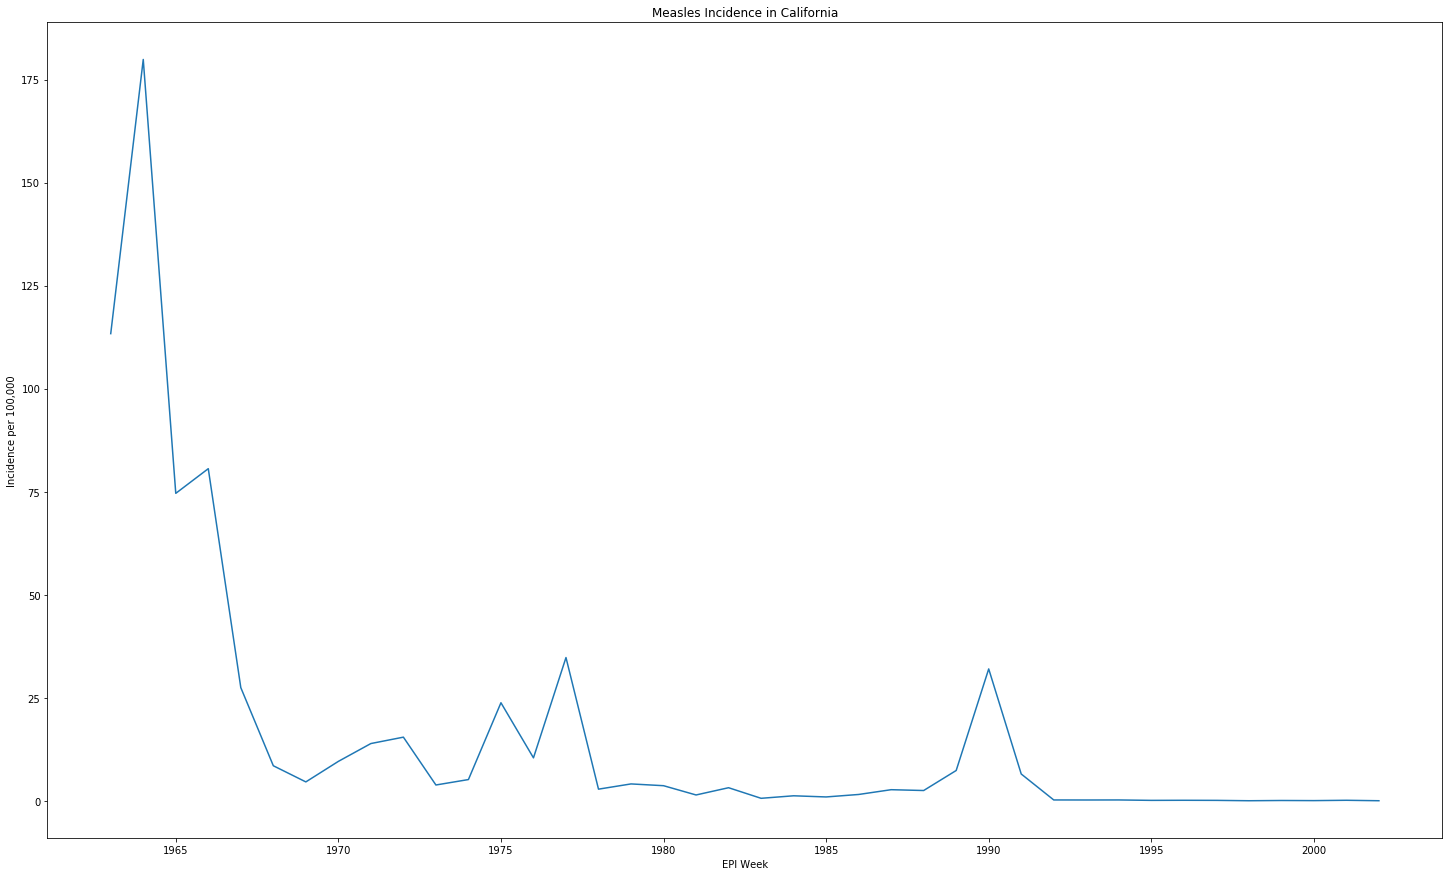

In [25]:
#measles vaccine was introduced in 1963
after_vac_df = ca_rounded_dropped_df.loc[ca_rounded_dropped_df["year"]>=1963]
plt.figure(figsize=(25,15))
plt.plot(after_vac_df["year"], after_vac_df["incidence_per_100000"])

plt.title("Measles Incidence in California")
plt.xlabel("EPI Week")
plt.ylabel("Incidence per 100,000")
plt.show()
plt.show()